# Classification using Deep neural network
Multiclass classification using Deep Neural Networks. Use the OCR letter recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [69]:
df = pd.read_csv('2_letter_recognition.data')
df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [70]:
df.shape

(19999, 17)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       19999 non-null  object
 1   2       19999 non-null  int64 
 2   8       19999 non-null  int64 
 3   3       19999 non-null  int64 
 4   5       19999 non-null  int64 
 5   1       19999 non-null  int64 
 6   8.1     19999 non-null  int64 
 7   13      19999 non-null  int64 
 8   0       19999 non-null  int64 
 9   6       19999 non-null  int64 
 10  6.1     19999 non-null  int64 
 11  10      19999 non-null  int64 
 12  8.2     19999 non-null  int64 
 13  0.1     19999 non-null  int64 
 14  8.3     19999 non-null  int64 
 15  0.2     19999 non-null  int64 
 16  8.4     19999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [72]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]
print(f'{X.shape} {Y.shape}')

(19999, 16) (19999,)


In [73]:
print(f'X=\n{X.head()}')
print(f'Y=\n{Y.head()}')

X=
   2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0  5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1  4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2  7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3  2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4  4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
Y=
0    I
1    D
2    N
3    G
4    S
Name: T, dtype: object


In [74]:
# label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
# one-hot encoding
y_categorical = to_categorical(y_encoded)

# split into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


print(f'y=\n\n{Y}')
print(f'\ny_encoded=\n\n{y_encoded}')
print(f'\ny_categorical=\n\n{y_categorical}')

y=

0        I
1        D
2        N
3        G
4        S
        ..
19994    D
19995    C
19996    T
19997    S
19998    A
Name: T, Length: 19999, dtype: object

y_encoded=

[ 8  3 13 ... 19 18  0]

y_categorical=

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [75]:
x_train.shape

(15999, 16)

In [76]:
# build model and add layers
model = models.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=26, activation='softmax')
])

C:\Users\ASHWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
# train model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3280 - loss: 2.5331 - val_accuracy: 0.6925 - val_loss: 1.1579
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7089 - loss: 1.0525 - val_accuracy: 0.7467 - val_loss: 0.8848
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7642 - loss: 0.8392 - val_accuracy: 0.7962 - val_loss: 0.7459
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.7063 - val_accuracy: 0.8127 - val_loss: 0.6516
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8291 - loss: 0.6036 - val_accuracy: 0.8138 - val_loss: 0.6062
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8439 - loss: 0.5428 - val_accuracy: 0.8240 - val_loss: 0.5645
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8561 - loss: 0.4887 - val_accuracy: 0.8508 - val_loss: 0.4872
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8656 - loss: 0.4445 - val_accuracy: 0.

In [79]:
# model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f'loss = {loss:.6f}')
print(f'accuracy = {accuracy:.6f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9312 - loss: 0.2393
loss = 0.223604
accuracy = 0.931250


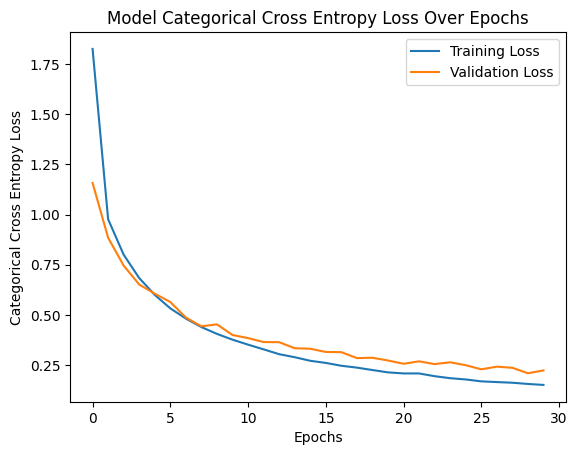

In [80]:
# loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Categorical Cross Entropy Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross Entropy Loss")
plt.legend()
plt.show()

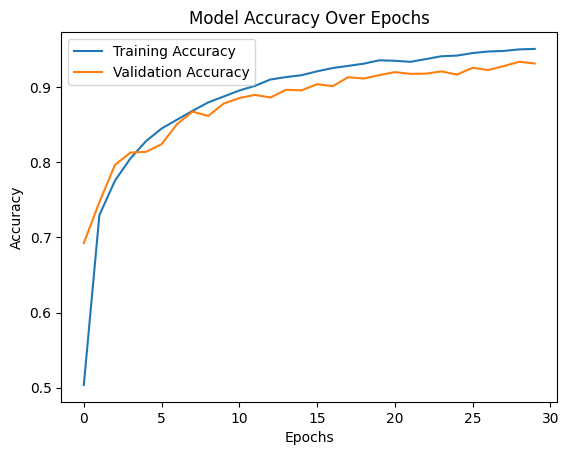

In [81]:
# accuracy vs epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
# show few predictions
y_pred = model.predict(x_test)
y_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.3238233e-08, 1.9263630e-04, 1.0698974e-06, ..., 9.8559928e-01,
        7.1013839e-10, 2.1390278e-11],
       [1.3666326e-07, 9.8161991e-06, 7.0691181e-05, ..., 6.0390253e-06,
        3.2107216e-11, 1.5644465e-11],
       [3.1198130e-18, 3.5819367e-10, 4.6356562e-16, ..., 7.0788237e-13,
        6.0684471e-09, 4.8390603e-15],
       ...,
       [1.8763825e-07, 2.9382333e-29, 6.9269201e-18, ..., 4.4874366e-22,
        1.3723788e-14, 0.0000000e+00],
       [9.3038988e-16, 4.6246788e-21, 2.3404283e-15, ..., 1.1002694e-09,
        2.8985436e-04, 2.5212476e-32],
       [1.5289751e-16, 5.7252423e-13, 1.2987502e-13, ..., 2.4452846e-13,
        5.8438199e-10, 1.1068810e-16]], dtype=float32)

In [83]:
predicted_labels = np.argmax(y_pred, axis=1)
actual_labels = np.argmax(y_test, axis=1)

predicted_decoded = label_encoder.inverse_transform(predicted_labels)
actual_decoded = label_encoder.inverse_transform(actual_labels)

In [84]:
print('Actual \t Predicted')
for i in range(10):
    print(f'{actual_decoded[i]} \t {predicted_decoded[i]}')

Actual 	 Predicted
X 	 X
R 	 R
P 	 P
I 	 I
I 	 I
Z 	 Z
C 	 C
Y 	 Y
G 	 G
X 	 X


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import string

In [86]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [87]:
labels = list(string.ascii_uppercase)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

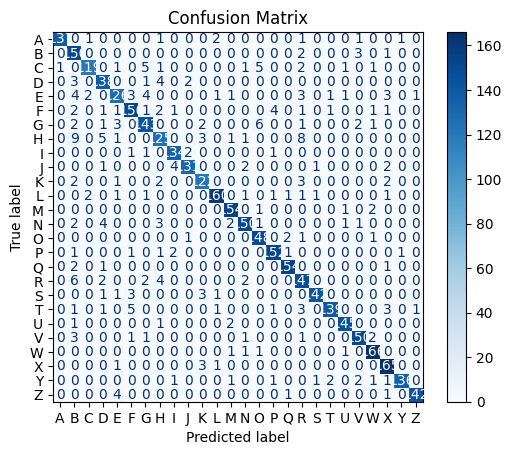

In [88]:
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()